# Proyecto: Preparación de datos

#### Francisca Rojas González

## Lección 1 - La librería numpy

Objetivo: Crear un conjunto de datos ficticio utilizando NumPy, aplicando operaciones básicas para la preparación inicial.

Tareas a desarrollar:
1. Crear un archivo.py o un Notebook.ipynb.
2. Generar datos ficticios de clientes y transacciones utilizando arrays de NumPy.
3. Aplicar operaciones matemáticas básicas (suma, media, conteo, etc.).
4. Guardar los datos generados en un archivo.npy o convertirlos a listas para usarlos luego en Pandas.
5. Explicar en un breve documento por qué NumPy es eficiente para el manejo de datos numéricos.

#### Pasos seguidos Lección 1

* Se generan datos con arrays de NumPy que sean coherentes para el posterior proceso de limpieza, con nulos, outliers, duplicados, y su integración desde archivos de diferente formato. Para clientes se crean 520, con nombre, edad, cuidad y su ID, y para transacciones 2000 son su fecha (realizadas en 2025), monto, categoría y asociada a un Id de cliente.
* Luego se aplican operaciones matemáticas como suma y promedio para ver estadísticas iniciales de los datos.
* Finalmente se guardan los datos como diccionario en un archivo.npy para su posterior uso y conversión a DataFrame.
* En este caso NumPy permitió la creación de datos ficticios con sus arreglos y funciones aleatorias, permitiendo definir todas las características que se requerían. Además, por su capacidad de cálculo vectorial se pudo hacer una visión inicial de los datos generados y sus estadísticas básicas, todo esto en unas cuantas líneas de código.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np

In [2]:
# ------- DATOS FICTICIOS PARA CLIENTES ------- #

# Configuración inicial, semilla números aleatorios y cantidad
rng = np.random.default_rng(42)
n_clientes = 500

# IDs con un arreglo numérico y se agredan duplicados aleatorios (20)
ids_base = np.arange(1, n_clientes + 1)
duplicados = rng.choice(ids_base, size=20)
ids_finales = np.concatenate([ids_base, duplicados])

# Nombres y Apellidos con arreglos que se mezclan para generar nombres completos aleatorios
nombres_base = np.array(["Ana", "Sofía", "Camila", "Mateo", "Benjamín", "Lucas", "Daniela", "Ignacio"])
apellidos_base = np.array(["González", "Muñoz", "Rojas", "Díaz", "Pérez", "Soto", "Silva"])
nombres_sucios = rng.choice(nombres_base, size=len(ids_finales)) + " " + rng.choice(apellidos_base, size=len(ids_finales))

# Ciudades con pesos y valores nulos (NaN), de forma aleatoria
ciudades_lista = np.array(["Santiago", "Valparaíso", "Concepción", "La Serena", "Antofagasta", None])
ciudades_sucias = rng.choice(ciudades_lista, size=len(ids_finales), p=[0.4, 0.15, 0.15, 0.12, 0.12, 0.06])

# Edad con valores nulos (NaN)
edades = np.clip(rng.normal(loc=35, scale=12, size=len(ids_finales)), 18, 70)
edades_con_nulos = edades.astype(float)
edades_con_nulos[rng.choice(len(edades_con_nulos), size=40, replace=False)] = np.nan

In [3]:
# --------- DATOS FICTICIOS PARA TRANSACCIONES --------- #

# Configuración inicial, semilla y cantidades 
rng = np.random.default_rng(42)
n_transacciones = 2000
n_clientes_base = 500  

# IDs de Transacción únicos
ids_tx = np.arange(1, n_transacciones + 1)

# Se asignan transacciones a los clientes existentes
# Algunos clientes tendrán muchas compras, otros ninguna
tx_id_cliente = rng.choice(np.arange(1, n_clientes_base + 1), size=n_transacciones)

# Fechas aleatorias dentro del 2025
dias_atras = rng.integers(45, 394, size=n_transacciones)
tx_fecha = (pd.Timestamp.today().normalize() - pd.to_timedelta(dias_atras, unit="D"))

# Montos de transacción con Outliers 
tx_monto = rng.lognormal(mean=np.log(5000), sigma=0.4, size=n_transacciones)
outliers = [25000, 28000, 32000, 15000, 18000]
tx_monto[0:5] = outliers
tx_monto = np.abs(tx_monto).astype(float)

# Categorías con valores nulos
categorias_base = np.array(["Electrónica", "Hogar", "Moda", "Deportes", None])
tx_categoria = rng.choice(categorias_base, size=n_transacciones, p=[0.2, 0.24, 0.3, 0.2, 0.06])

In [4]:
# ------- OPERACIONES MATEMÁTICAS BÁSICAS -------- #

print("--- ESTADÍSTICAS CLIENTES ---")
print(f"Conteo total de registros: {len(ids_finales)}") 
print(f"Media de edad (sin NaN): {np.nanmean(edades_con_nulos):.1f}") 

print("--- ESTADÍSTICAS TRANSACCIONES ---")
print(f"Total registros: {len(ids_tx)}")
print(f"Monto promedio: {np.mean(tx_monto):.2f}")
print(f"Suma total montos: {np.sum(tx_monto):.2f}")

--- ESTADÍSTICAS CLIENTES ---
Conteo total de registros: 520
Media de edad (sin NaN): 35.8
--- ESTADÍSTICAS TRANSACCIONES ---
Total registros: 2000
Monto promedio: 5506.87
Suma total montos: 11013736.87


In [5]:
# ------- GUARDADO DE DATOS EN ARCHIVOS '.NPY' --------- #

datos_clientes = {
    'ID_CLIENTE_RAW': ids_finales,
    'NOMBRE_COMPLETO_TXT': nombres_sucios,
    'UBICACION_CIUDAD': ciudades_sucias,
    'EDAD_USUARIO': edades_con_nulos,}

# Crear archivo de datos clientes 
np.save('datos_clientes.npy', datos_clientes)

datos_tx = {
    'ID_TX': ids_tx,
    'ID_CLI': tx_id_cliente,
    'FECHA': tx_fecha.values,
    'CAT': tx_categoria,
    'MTO': tx_monto}

# Crear archivo de datos transacciones
np.save('datos_transacciones.npy', datos_tx)

## Lección 2 - La librería pandas

Objetivo: Explorar y transformar los datos generados en la Lección 1, utilizando la estructura de DataFrame de Pandas.

Tareas a desarrollar:
1. Leer los datos preparados en NumPy y convertirlos en un DataFrame.
2. Realizar una exploración inicial:
    * Visualizar primeras y últimas filas.
    * Obtener estadísticas descriptivas.
    * Aplicar filtros condicionales.
3. Guardar el DataFrame preliminar en un archivo CSV para ser utilizado en la siguiente lección.
4. Redactar un documento breve describiendo los hallazgos y la utilidad de Pandas para la manipulación de datos.

### Pasos seguidos Lección 2

* Se cargan archivos '.npy' para ser convertidos a DataFrame.
* Se realiza una exploración inicial de los datos (visualizar primeros y últimos datos) en ambos casos (clientes y transacciones). Se aplican estadísticas básicas de valores numéricos.
* En el caso de transacciones se realizan unos últimos ajustes para ser trabajados en la limpieza (agregan duplicados).
* Se aplican algunos filtros condicionales para un exploración un poco más detallada.
* Se guardan los datos de clientes en formato CSV y los datos de transacción en formato Excel. Ambos para su posterior uso.
* Pandas toma datos en formato diccionario (con su multidimesionalidad) y permitió convertirlos a DataFrame para su posterior manipulación. Se pudo visualizar los datos en formato tabla (bidimencional) y mostrar primeras estadísticas de los valores numéricos, de forma rápida y eficiente (un par de líneas de código), además de guardar los datos en formatos diversos como CSV y Excel.

In [6]:
# ------- CONVERSIÓN A DATAFRAME CLIENTES --------- #

# Carga del archivo .npy y conversión a DataFrame
datos_clientes = np.load('datos_clientes.npy', allow_pickle=True).item() 
df_clt = pd.DataFrame(datos_clientes) 

print("--- EXPLORACIÓN INICIAL DATAFRAME (PRIMERAS Y ÚLTIMAS FILAS) ---")
df_clt

--- EXPLORACIÓN INICIAL DATAFRAME (PRIMERAS Y ÚLTIMAS FILAS) ---


,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO
0,1,Benjamín Pérez,Concepción,22.747458
1,2,Camila González,La Serena,35.626080
2,3,Sofía Muñoz,Santiago,31.713794
3,4,Ignacio Muñoz,Concepción,30.958016
4,5,Daniela Soto,Santiago,42.436424
...,...,...,...,...
515,394,Sofía Silva,Santiago,41.664323
516,257,Mateo Díaz,Santiago,38.712699
517,65,Ana Soto,La Serena,46.777757
518,420,Benjamín Rojas,Antofagasta,21.022063


In [7]:
print("--- EXPLORACIÓN INICIAL DATAFRAME: ESTADÍSTICAS BÁSICAS ---")
df_clt.describe()

--- EXPLORACIÓN INICIAL DATAFRAME: ESTADÍSTICAS BÁSICAS ---


,ID_CLIENTE_RAW,EDAD_USUARIO
count,520.000000,480.000000
mean,251.230769,35.845593
std,144.368776,11.403928
min,1.000000,18.000000
25%,125.750000,27.526337
50%,252.500000,35.464906
75%,376.250000,43.294952
max,500.000000,68.710530


In [8]:
print("--- FILTRADO CLIENTES EN SANTIAGO ---")
df_clt_filtrado = df_clt[df_clt["UBICACION_CIUDAD"] == 'Santiago']
df_clt_filtrado

--- FILTRADO CLIENTES EN SANTIAGO ---


,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO
2,3,Sofía Muñoz,Santiago,31.713794
4,5,Daniela Soto,Santiago,42.436424
5,6,Lucas González,Santiago,39.078504
7,8,Daniela Pérez,Santiago,39.917941
8,9,Benjamín Díaz,Santiago,42.393616
...,...,...,...,...
510,264,Benjamín Díaz,Santiago,47.946548
514,359,Benjamín González,Santiago,42.407379
515,394,Sofía Silva,Santiago,41.664323
516,257,Mateo Díaz,Santiago,38.712699


In [9]:
# ------- CONVERSIÓN A DATAFRAME TRANSACCIONES --------- #

datos_transacciones = np.load('datos_transacciones.npy', allow_pickle=True).item() 
df_tx = pd.DataFrame(datos_transacciones) 

# Insertar duplicados de filas (para posterior limpieza)
df_tx = pd.concat([df_tx, df_tx.iloc[:25]], ignore_index=True)

print("--- EXPLORACIÓN INICIAL DATAFRAME (PRIMERAS Y ÚLTIMAS FILAS) ---")
df_tx

--- EXPLORACIÓN INICIAL DATAFRAME (PRIMERAS Y ÚLTIMAS FILAS) ---


,ID_TX,ID_CLI,FECHA,CAT,MTO
0,1,45,2025-02-12,Moda,25000.000000
1,2,387,2025-11-24,None,28000.000000
2,3,328,2025-07-30,Moda,32000.000000
3,4,220,2025-07-09,Moda,15000.000000
4,5,217,2025-03-12,Moda,18000.000000
...,...,...,...,...,...
2020,21,251,2025-09-01,Electrónica,6803.115504
2021,22,186,2025-04-29,Hogar,2344.728104
2022,23,92,2025-04-30,Moda,5453.988499
2023,24,464,2025-05-20,Hogar,9388.363937


In [10]:
print("--- EXPLORACIÓN INICIAL DATAFRAME: ESTADÍSTICAS BÁSICAS ---")
df_tx.describe()

--- EXPLORACIÓN INICIAL DATAFRAME: ESTADÍSTICAS BÁSICAS ---


,ID_TX,ID_CLI,FECHA,MTO
count,2025.000000,2025.000000,2025,2025.000000
mean,988.308642,250.692346,2025-06-23 05:22:08,5549.742595
min,1.000000,1.000000,2025-01-01 00:00:00,1468.036753
25%,482.000000,124.000000,2025-03-28 00:00:00,3846.411084
50%,988.000000,251.000000,2025-06-26 00:00:00,5052.194775
75%,1494.000000,378.000000,2025-09-21 00:00:00,6592.040516
max,2000.000000,500.000000,2025-12-15 00:00:00,32000.000000
std,584.189640,144.961756,NaN,2644.042329


In [11]:
print("--- FILTRADO MONTOS MAYORES A 100000 ---")
df_tx_filtrado = df_tx[df_tx["MTO"] > 10000]
df_tx_filtrado

--- FILTRADO MONTOS MAYORES A 100000 ---


,ID_TX,ID_CLI,FECHA,CAT,MTO
0,1,45,2025-02-12,Moda,25000.0
1,2,387,2025-11-24,None,28000.0
2,3,328,2025-07-30,Moda,32000.0
3,4,220,2025-07-09,Moda,15000.0
4,5,217,2025-03-12,Moda,18000.0
...,...,...,...,...,...
2000,1,45,2025-02-12,Moda,25000.0
2001,2,387,2025-11-24,None,28000.0
2002,3,328,2025-07-30,Moda,32000.0
2003,4,220,2025-07-09,Moda,15000.0


In [12]:
# ------ GUARDADO DE ARCHIVOS ------- #

# Clientes en CSV
df_clt.to_csv("datos_sucios_clientes.csv", index=False, encoding="utf-8-sig")

# Transacciones a Excel
df_tx.to_excel("datos_sucios_transacciones.xlsx", index=False)

## Lección 3 - Obtención de datos desde archivos

Objetivo: Integrar datos de diversas fuentes y unificarlos en un solo DataFrame para su posterior limpieza.

Tareas a desarrollar:
1. Cargar el archivo CSV generado en la Lección2.
2. Incorporar nuevas fuentes de datos:
    * Leer un archivo Excel con información complementaria.
    * Extraer datos de una tabla web usando read_html().
3. Unificar las diferentes fuentes de datos en un único DataFrame.
4. Guardar el DataFrame consolidado y documentar los desafíos encontrados al obtener datos de distintos formatos.

### Pasos seguidos Lección 3
* Se cargan los archivos en formato CSV (contiene clientes), excel (contiene transacciones).
* Se unen los datos de clientes con las transacciones, manteniendo todos los datos de clientes, y asignándole sus respectivas transacciones.
* Se visualiza para confirmar que los datos hayan quedado correctamente unificados.
* Por otro lado, se cargan datos del valor de la UF en 2025, se hace una mirada rápida de las tablas contenidas y se elige la que tiene todos los campos requeridos, valores UF por día (fila) y mes (columnas), todo para guardarla en un único DataFrame, que será utilizado posteriormente.
* Pandas nos permiten cargar datos de diversas fuentes, y convertirlos a DataFrame, el desafío está en ver en qué estado llegan esos datos y cómo se pueden trabajar para llegar a manejarlos adecuadamente, como es el caso complejo de las tablas cargadas de la página por ejemplo, que deberán ser sometidas a un tratamiento más exhaustivo para el uso de la información contenida.

In [13]:
# ------ CARGAR DATOS EN FORMATO CSV ------- #
df_csv = pd.read_csv("datos_sucios_clientes.csv")

# ------ CARGAR DATOS EN EXCEL -------- # 
df_excel = pd.read_excel("datos_sucios_transacciones.xlsx")

In [14]:
# ------- UNIFICAR DATOS CLIENTES Y TRANSACCIONES -------- #
df_unificado = pd.merge(df_csv, df_excel, left_on="ID_CLIENTE_RAW", right_on="ID_CLI", how='left')
df_unificado

,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO,ID_TX,ID_CLI,FECHA,CAT,MTO
0,1,Benjamín Pérez,Concepción,22.747458,1409.0,1.0,2025-04-29,Moda,3449.082522
1,1,Benjamín Pérez,Concepción,22.747458,1482.0,1.0,2025-09-21,Hogar,3853.139214
2,1,Benjamín Pérez,Concepción,22.747458,1488.0,1.0,2025-01-15,Hogar,5129.606738
3,1,Benjamín Pérez,Concepción,22.747458,1949.0,1.0,2025-01-11,Deportes,4558.593078
4,2,Camila González,La Serena,35.626080,1739.0,2.0,2025-04-26,Deportes,2946.221064
...,...,...,...,...,...,...,...,...,...
2157,420,Benjamín Rojas,Antofagasta,21.022063,19.0,420.0,2025-04-08,Moda,9855.922915
2158,226,Ana Rojas,Santiago,59.105065,20.0,226.0,2025-07-08,Deportes,2925.002774
2159,226,Ana Rojas,Santiago,59.105065,31.0,226.0,2025-06-05,Moda,4452.597645
2160,226,Ana Rojas,Santiago,59.105065,1919.0,226.0,2025-11-24,Hogar,3079.212937


In [15]:
# ------- CARGAR DATOS DE UNA PÁGINA WEB -------- #

# Paquetes complementarios para la carga de datos 
import requests
from io import StringIO

# Definición de parámetros que permiten la descarga sin inconvenientes
url = "https://www.sii.cl/valores_y_fechas/uf/uf2025.htm"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36",
    "Accept-Language": "es-ES,es;q=0.9"}
html = requests.get(url, headers=headers, timeout=30).text

# Carga de datos
df_list = pd.read_html(StringIO(html))

# Ver cantidad de tablas, sus dimensiones y primeras columnas (6)
print("Cantidad de tablas:", len(df_list))
for i, t in enumerate(df_list):
    print(i, t.shape, "->", list(t.columns)[:6])

Cantidad de tablas: 13
0 (11, 6) -> ['Diciembre', 'Diciembre.1', 'Diciembre.2', 'Diciembre.3', 'Diciembre.4', 'Diciembre.5']
1 (11, 6) -> ['Noviembre', 'Noviembre.1', 'Noviembre.2', 'Noviembre.3', 'Noviembre.4', 'Noviembre.5']
2 (11, 6) -> ['Octubre', 'Octubre.1', 'Octubre.2', 'Octubre.3', 'Octubre.4', 'Octubre.5']
3 (11, 6) -> ['Septiembre', 'Septiembre.1', 'Septiembre.2', 'Septiembre.3', 'Septiembre.4', 'Septiembre.5']
4 (11, 6) -> ['Agosto', 'Agosto.1', 'Agosto.2', 'Agosto.3', 'Agosto.4', 'Agosto.5']
5 (11, 6) -> ['Julio', 'Julio.1', 'Julio.2', 'Julio.3', 'Julio.4', 'Julio.5']
6 (11, 6) -> ['Junio', 'Junio.1', 'Junio.2', 'Junio.3', 'Junio.4', 'Junio.5']
7 (11, 6) -> ['Mayo', 'Mayo.1', 'Mayo.2', 'Mayo.3', 'Mayo.4', 'Mayo.5']
8 (11, 6) -> ['Abril', 'Abril.1', 'Abril.2', 'Abril.3', 'Abril.4', 'Abril.5']
9 (11, 6) -> ['Marzo', 'Marzo.1', 'Marzo.2', 'Marzo.3', 'Marzo.4', 'Marzo.5']
10 (11, 6) -> ['Febrero', 'Febrero.1', 'Febrero.2', 'Febrero.3', 'Febrero.4', 'Febrero.5']
11 (11, 6) -> ['

In [16]:
# Elección de la tabla a utilizar y crear un DataFrame particular para esos datos
df_uf_2025 = df_list[12].copy()
df_uf_2025

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,"38.419,17","38.381,93","38.663,05","38.899,12","39.081,90","39.191,97","39.269,69","39.173,95","39.394,46","39.485,65","39.602,77","39.643,59"
1,2,"38.421,65","38.379,45","38.678,15","38.904,13","39.088,40","39.194,50","39.272,30","39.168,88","39.405,85","39.485,65","39.607,87","39.643,59"
2,3,"38.424,12","38.376,97","38.693,27","38.909,14","39.094,90","39.197,03","39.274,92","39.163,82","39.417,24","39.485,65","39.612,97","39.643,59"
3,4,"38.426,60","38.374,49","38.708,39","38.914,15","39.101,40","39.199,55","39.277,53","39.158,75","39.428,63","39.485,65","39.618,08","39.643,59"
4,5,"38.429,08","38.372,01","38.723,52","38.919,16","39.107,90","39.202,08","39.280,15","39.153,69","39.440,03","39.485,65","39.623,18","39.643,59"
5,6,"38.431,55","38.369,54","38.738,65","38.924,18","39.114,40","39.204,61","39.282,76","39.148,63","39.451,43","39.485,65","39.628,28","39.643,59"
6,7,"38.434,03","38.367,06","38.753,79","38.929,19","39.120,91","39.207,13","39.285,38","39.143,57","39.462,83","39.485,65","39.633,38","39.643,59"
7,8,"38.436,51","38.364,58","38.768,93","38.934,20","39.127,41","39.209,66","39.288,00","39.138,51","39.474,24","39.485,65","39.638,49","39.643,59"
8,9,"38.438,98","38.362,10","38.784,08","38.939,22","39.133,92","39.212,19","39.290,61","39.133,45","39.485,65","39.485,65","39.643,59","39.643,59"
9,10,"38.436,50","38.377,09","38.789,07","38.945,69","39.136,44","39.214,80","39.285,53","39.144,76","39.485,65","39.490,74","39.643,59","39.647,42"


In [17]:
# ------ GUARDADO DE DATAFRAME UNIFICADO ------- #
df_unificado.to_csv("datos_unificados.csv", index=False, encoding="utf-8-sig")

# ------ GUARDADO DATOS UF 2025 -------- #
df_uf_2025.to_csv("datos_uf_2025.csv", index=False, encoding="utf-8-sig")

## Lección 4 - Manejo de valores perdidos y outliers

Objetivo: Aplicar técnicas de limpieza de datos, resolviendo problemas de valores nulos y datos atípicos.

Tareas a desarrollar:
1. Identificar valores nulos en el DataFrame consolidado.
2. Aplicar técnicas de imputación, eliminación o categorización para gestionar los valores nulos.
3. Detectar outliers utilizando técnicas como IQR y Z-score.
4. Documentar las decisiones tomadas y cómo impactan en la calidad del dataset.
5. Guardar el DataFrame limpio para ser usado en la siguiente etapa.

### Pasos seguidos Lección 4

* Se cargan datos unificados, y se crea una copia de seguridad.
* Se nota columna de "ID" duplicada (al unir previamente ambos datas), así que se elimina una.
* Se identifican valores nulos por columna. Y se encontraron que había una cantidad repetida de nulos en ID transacción, fecha y relación con categoría, por lo que, se buscaron dichas filas y se llegó a la conclusión que eran clientes sin transacciones. Dado esta situación, la imputación se hizo primero para esos casos en particular y luego para el general, pues los valores no serían iguales.
* Imputación casos sin transacciones:
    * ID transacción (ID_TX): se deja nulo
    * Monto (MTO): 0
    * Categoría (CAT): con "Sin Actividad"
    * Fecha: se deja el nulo
* Se decidió mantener los valores nulos (NaN) en los campos ID_Transacción y Fecha para aquellos clientes identificados como 'Inactivos' (sin transacciones). Esta decisión evita el sesgo en el conteo de transacciones. Así, permitiendo una diferenciación clara entre un error de datos y una realidad.
* Imputación demás casos:
    * Edad (EDAD_USUARIO): con la media aritmetica (promedio) de las edades
    * Cuidad (UBICACION_CIUDAD): con valor 'Desconocido'
    * Categoría (CAT): con 'Otros'
    * Monto (MTO): con la mediana de los montos
* Agregar con 'Desconocido' y 'Otros' en vez de la moda por ejemplo, no distorsiona la realidad sumando más a cierta categoría, si no que muestra posibles errores en el llenado o carga de datos.
* Se buscaron outliers con el método IQR y Z-score. El primero arrojó alrededor del triple que el segundo 33. Se hizo la gráfica de cajón para una mejor visualización.
* Finalmente se decidió hacer winsorización para los outliers, así en lugar de eliminar la fila y perder al cliente, solo se cambian los valores que exceden el límite superior por el valor máximo permitido por el IQR. Y al comparar estadísticas se pudo notar que no cambió en gran medida, salvo el promedio y la desviación estándar, que sería lo esperable en este caso, pues los datos son "aplanados".

In [18]:
# ----- CARGAR DATOS UNIFICADOS Y CREAR COPIA DE RESPALDO ------ #
df_unif = pd.read_csv("datos_unificados.csv")
df_sucio = df_unif.copy()

# Ver que la copia sea el mismo data
df_sucio

,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO,ID_TX,ID_CLI,FECHA,CAT,MTO
0,1,Benjamín Pérez,Concepción,22.747458,1409.0,1.0,2025-04-29,Moda,3449.082522
1,1,Benjamín Pérez,Concepción,22.747458,1482.0,1.0,2025-09-21,Hogar,3853.139214
2,1,Benjamín Pérez,Concepción,22.747458,1488.0,1.0,2025-01-15,Hogar,5129.606738
3,1,Benjamín Pérez,Concepción,22.747458,1949.0,1.0,2025-01-11,Deportes,4558.593078
4,2,Camila González,La Serena,35.626080,1739.0,2.0,2025-04-26,Deportes,2946.221064
...,...,...,...,...,...,...,...,...,...
2157,420,Benjamín Rojas,Antofagasta,21.022063,19.0,420.0,2025-04-08,Moda,9855.922915
2158,226,Ana Rojas,Santiago,59.105065,20.0,226.0,2025-07-08,Deportes,2925.002774
2159,226,Ana Rojas,Santiago,59.105065,31.0,226.0,2025-06-05,Moda,4452.597645
2160,226,Ana Rojas,Santiago,59.105065,1919.0,226.0,2025-11-24,Hogar,3079.212937


In [19]:
# Elimina columna duplicada de la unión
df_sucio = df_sucio.drop(columns=['ID_CLI'])
df_sucio

,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO,ID_TX,FECHA,CAT,MTO
0,1,Benjamín Pérez,Concepción,22.747458,1409.0,2025-04-29,Moda,3449.082522
1,1,Benjamín Pérez,Concepción,22.747458,1482.0,2025-09-21,Hogar,3853.139214
2,1,Benjamín Pérez,Concepción,22.747458,1488.0,2025-01-15,Hogar,5129.606738
3,1,Benjamín Pérez,Concepción,22.747458,1949.0,2025-01-11,Deportes,4558.593078
4,2,Camila González,La Serena,35.626080,1739.0,2025-04-26,Deportes,2946.221064
...,...,...,...,...,...,...,...,...
2157,420,Benjamín Rojas,Antofagasta,21.022063,19.0,2025-04-08,Moda,9855.922915
2158,226,Ana Rojas,Santiago,59.105065,20.0,2025-07-08,Deportes,2925.002774
2159,226,Ana Rojas,Santiago,59.105065,31.0,2025-06-05,Moda,4452.597645
2160,226,Ana Rojas,Santiago,59.105065,1919.0,2025-11-24,Hogar,3079.212937


In [20]:
# -------- IDENTIFICAR VALORES NULOS --------- #

print('---- Valores nulos por columna ----')
print(df_sucio.isna().sum())

# Porcentaje de nulos por columna
pct_nulos = (df_sucio.isna().mean() * 100).round(2).sort_values(ascending=False)

print('---- Porcentaje nulos por columna ----')
print(pct_nulos)

---- Valores nulos por columna ----
ID_CLIENTE_RAW           0
NOMBRE_COMPLETO_TXT      0
UBICACION_CIUDAD       132
EDAD_USUARIO           154
ID_TX                   16
FECHA                   16
CAT                    123
MTO                     16
dtype: int64
---- Porcentaje nulos por columna ----
EDAD_USUARIO           7.12
UBICACION_CIUDAD       6.11
CAT                    5.69
ID_TX                  0.74
FECHA                  0.74
MTO                    0.74
ID_CLIENTE_RAW         0.00
NOMBRE_COMPLETO_TXT    0.00
dtype: float64


In [21]:
# Ver nulos de ID_TX para ver posibles coincidencias con otros valores
filtro_id_nulo = df_sucio[df_sucio['ID_TX'].isna()]
filtro_id_nulo

,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO,ID_TX,FECHA,CAT,MTO
57,14,Benjamín Rojas,NaN,34.944404,NaN,NaN,NaN,NaN
78,20,Lucas Soto,Valparaíso,28.664988,NaN,NaN,NaN,NaN
138,35,Mateo González,Concepción,40.250147,NaN,NaN,NaN,NaN
345,80,Sofía González,Valparaíso,NaN,NaN,NaN,NaN,NaN
690,169,Sofía Díaz,Concepción,42.594295,NaN,NaN,NaN,NaN
719,177,Camila Díaz,La Serena,47.090129,NaN,NaN,NaN,NaN
985,243,Camila González,Concepción,34.537541,NaN,NaN,NaN,NaN
1041,256,Mateo Rojas,Santiago,53.443588,NaN,NaN,NaN,NaN
1272,313,Camila Silva,Valparaíso,18.000000,NaN,NaN,NaN,NaN
1356,334,Mateo González,Concepción,45.991164,NaN,NaN,NaN,NaN


In [22]:
# ------ IMPUTAR SOLO A INACTIVOS (SIN TRANSACCIONES) -------#

# Identificar los inactivos (True)
mask_inactivos = df_sucio['ID_TX'].isnull()

# Imputar solo a los inactivos en las columnas de transacciones
df_sucio.loc[mask_inactivos, 'CAT'] = "Sin Actividad"
df_sucio.loc[mask_inactivos, 'MTO'] = 0

In [23]:
# -------- IMPUTACIÓN DE VALORES FALTANTES -------- #

df_sucio["EDAD_USUARIO"] = df_sucio["EDAD_USUARIO"].fillna(df_sucio["EDAD_USUARIO"].mean()) 
df_sucio['UBICACION_CIUDAD'] = df_sucio['UBICACION_CIUDAD'].fillna('Desconocido')
df_sucio['MTO'] = df_sucio['MTO'].fillna(df_sucio['MTO'].median())
df_sucio['CAT'] = df_sucio['CAT'].fillna('Otros')

In [24]:
# ------- COMPROBAR VALORES IMPUTADOS --------- #

df_sucio.isna().sum()

ID_CLIENTE_RAW          0
NOMBRE_COMPLETO_TXT     0
UBICACION_CIUDAD        0
EDAD_USUARIO            0
ID_TX                  16
FECHA                  16
CAT                     0
MTO                     0
dtype: int64

In [25]:
# ------- DETECCIÓN DE OUTLIERS PARA EL MONTO CON IQR (RANGO INTERCUARTIL) ------- #
Q1 = df_sucio['MTO'].quantile(0.25)
Q3 = df_sucio['MTO'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Identificar outliers: valores < límite inferior o > límite superior
outliers_iqr = df_sucio[(df_sucio["MTO"] < lim_inf) | (df_sucio["MTO"] > lim_sup)]

print("Outliers detectados (IQR):", outliers_iqr.shape[0], "\nLímite inferior:", lim_inf, "\nLímite superior:", lim_sup)

Outliers detectados (IQR): 90 
Límite inferior: -320.51866575364784 
Límite superior: 10756.520370355533


In [26]:
# ------ DETECCIÓN DE OUTLIERS PARA EL MONTO CON Z-SCORE ------ #

# importar funciones necesarias para aplicar z-score
from scipy.stats import zscore

# aplicación Z-score
monto_zscore = zscore(df_sucio["MTO"])
outliers_z = df_sucio[np.abs(monto_zscore) > 3]

print("Outliers detectados (Z-score):", outliers_z.shape[0])

Outliers detectados (Z-score): 33


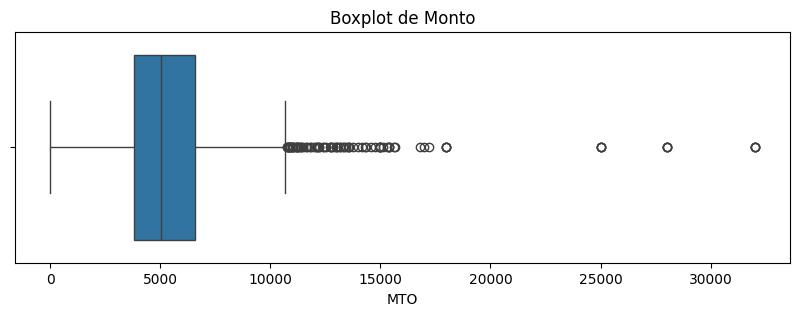

In [27]:
# ------- GRÁFICO DE CAJA PARA VISUALIZAR OUTLIERS DE MEJOR MANERA ------- #

# Carga librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sucio["MTO"])
plt.title("Boxplot de Monto")
plt.show()

In [28]:
# ------ APLICAR WINSORIZACIÓN CON EL LÍMITE SUPERIOR DEL MÉTODO IQR -------- #
df_sucio['Monto_Winsorizado'] = df_sucio['MTO'].clip(upper=lim_sup)

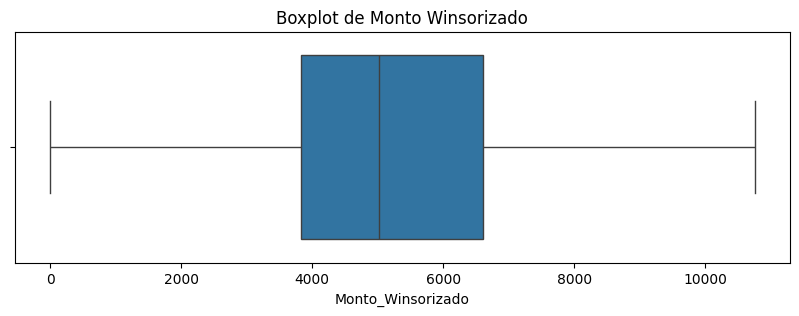

In [29]:
# ------- GRÁFICO DE CAJA PARA VISUALIZAR LOS MONTOS WINSORIZADOS ------- #

plt.figure(figsize=(10, 3))
sns.boxplot(x=df_sucio["Monto_Winsorizado"])
plt.title("Boxplot de Monto Winsorizado")
plt.show()

In [30]:
print(" ----- Resumen antes vs después: -----")
df_sucio[["MTO", "Monto_Winsorizado"]].describe()

 ----- Resumen antes vs después: -----


,MTO,Monto_Winsorizado
count,2162.000000,2162.000000
mean,5585.727912,5401.863884
std,2960.593201,2170.553668
min,0.000000,0.000000
25%,3833.370973,3833.370973
50%,5028.223524,5028.223524
75%,6602.630732,6602.630732
max,32000.000000,10756.520370


In [31]:
# ------ GUARDADO DE DATAFRAME LIMPIO ------- #

df_sucio.to_csv("datos_limpio.csv", index=False, encoding="utf-8-sig")

## Lección 5 - DATA WRANGLING

Objetivo: Transformar y enriquecer los datos mediante técnicas de manipulación avanzada.

Tareas a desarrollar:
1. Tomar el DataFrame limpio de la Lección4.
2. Aplicar técnicas de Data Wrangling:
    * Eliminar registros duplicados.
    * Transformar tipos de datos.
    * Crear nuevas columnas calculadas.
    * Aplicar funciones personalizadas (apply(), map(), lambda).
    * Normalizar o discretizar columnas según sea necesario.
3. Guardar la nueva versión del DataFrame optimizado.

### Pasos seguidos Lección 5
* Se cargan datos limpios, se realiza una copia y se hace una primera vista general.
* Se busca y elimina resgistros duplicados.
* Se ven tipos de datos e información general del data. Se hice el cambio de las fechas a DataTime, y de las edades y montos a int, para mayor coherencia de los datos, mejor visualización y manipulación.
* Cambio nombres de columnas para mejor lectura.
* Se crean dos nuevas columnas, una para el perfil del cliente, basado en el monto de sus transacciones (se usa el percentil 80 como criterio de corte), y otro para el grupo etario considerando la edad del cliente para su partición.
* Reordemaniento de las columnas para mayor coherencia, considerando al cliente como objeto principal con sus respecivos datos, y luegos las transacciones con sus datos.

In [32]:
# ----- CARGAR DATOS LIMPIOS ------ #

df_limp = pd.read_csv("datos_limpio.csv")
df_limpio = df_limp.copy()
df_limpio

,ID_CLIENTE_RAW,NOMBRE_COMPLETO_TXT,UBICACION_CIUDAD,EDAD_USUARIO,ID_TX,FECHA,CAT,MTO,Monto_Winsorizado
0,1,Benjamín Pérez,Concepción,22.747458,1409.0,2025-04-29,Moda,3449.082522,3449.082522
1,1,Benjamín Pérez,Concepción,22.747458,1482.0,2025-09-21,Hogar,3853.139214,3853.139214
2,1,Benjamín Pérez,Concepción,22.747458,1488.0,2025-01-15,Hogar,5129.606738,5129.606738
3,1,Benjamín Pérez,Concepción,22.747458,1949.0,2025-01-11,Deportes,4558.593078,4558.593078
4,2,Camila González,La Serena,35.626080,1739.0,2025-04-26,Deportes,2946.221064,2946.221064
...,...,...,...,...,...,...,...,...,...
2157,420,Benjamín Rojas,Antofagasta,21.022063,19.0,2025-04-08,Moda,9855.922915,9855.922915
2158,226,Ana Rojas,Santiago,59.105065,20.0,2025-07-08,Deportes,2925.002774,2925.002774
2159,226,Ana Rojas,Santiago,59.105065,31.0,2025-06-05,Moda,4452.597645,4452.597645
2160,226,Ana Rojas,Santiago,59.105065,1919.0,2025-11-24,Hogar,3079.212937,3079.212937


In [33]:
# ------ VER SI HAY DUPLICADOS ------ #
df_limpio.duplicated().sum()

np.int64(45)

In [34]:
# ------ ELIMINACIÓN DE DUPLICADOS ------- #
df_limpio.drop_duplicates(subset=['ID_CLIENTE_RAW'], keep='first', inplace=True)
df_limpio.duplicated().sum()

np.int64(0)

In [35]:
# ------- VISUALIZAR TIPOS DE DATOS ------- #
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 2037
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_CLIENTE_RAW       500 non-null    int64  
 1   NOMBRE_COMPLETO_TXT  500 non-null    object 
 2   UBICACION_CIUDAD     500 non-null    object 
 3   EDAD_USUARIO         500 non-null    float64
 4   ID_TX                484 non-null    float64
 5   FECHA                484 non-null    object 
 6   CAT                  500 non-null    object 
 7   MTO                  500 non-null    float64
 8   Monto_Winsorizado    500 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 39.1+ KB


In [36]:
# ------- CAMBIAR TIPOS DE DATOS --------- #
df_limpio['FECHA'] = pd.to_datetime(df_limpio['FECHA'])
df_limpio['EDAD_USUARIO'] = df_limpio['EDAD_USUARIO'].astype(int)
df_limpio['MTO'] = df_limpio['MTO'].astype(int)
df_limpio['Monto_Winsorizado'] = df_limpio['Monto_Winsorizado'].astype(int)

# Comprobar cambio te tipo
print(df_limpio['FECHA'].dtype, df_limpio['EDAD_USUARIO'].dtype, df_limpio['MTO'].dtype)

datetime64[ns] int64 int64


In [37]:
# ------- RENOMBRAR COLUMNAS -------- #
df_limpio.rename(columns={'ID_CLIENTE_RAW': 'ID_CLT', 'NOMBRE_COMPLETO_TXT': 'NOMBRE', 'UBICACION_CIUDAD': 'CIUDAD',
                            'EDAD_USUARIO':'EDAD', 'CAT':'CATEGORÍA','MTO':'MONTO','Monto_Winsorizado':'MONTO_W'}, inplace=True)

print("-------- Data con nuevos nombres --------")
df_limpio

-------- Data con nuevos nombres --------


,ID_CLT,NOMBRE,CIUDAD,EDAD,ID_TX,FECHA,CATEGORÍA,MONTO,MONTO_W
0,1,Benjamín Pérez,Concepción,22,1409.0,2025-04-29,Moda,3449,3449
4,2,Camila González,La Serena,35,1739.0,2025-04-26,Deportes,2946,2946
7,3,Sofía Muñoz,Santiago,31,381.0,2025-10-14,Electrónica,5172,5172
16,4,Ignacio Muñoz,Concepción,30,104.0,2025-10-31,Hogar,3928,3928
21,5,Daniela Soto,Santiago,42,303.0,2025-05-31,Electrónica,5518,5518
...,...,...,...,...,...,...,...,...,...
2021,496,Ana Soto,Santiago,35,347.0,2025-08-23,Hogar,3502,3502
2024,497,Ignacio Silva,Desconocido,41,145.0,2025-08-11,Deportes,9270,9270
2028,498,Ana González,Santiago,45,511.0,2025-10-07,Moda,3668,3668
2033,499,Mateo Díaz,La Serena,18,161.0,2025-03-08,Hogar,4507,4507


In [38]:
# ------- CREACIÓN DE PERFIL CLIENTE CON FUNCIÓN LAMBDA -------- #

df_limpio['PERFIL'] = df_limpio['MONTO'].apply(lambda x: 'Premium' if x > df_limpio['MONTO'].quantile(0.8) else 'Estándar')

In [39]:
# ------- CREACIÓN DE GRUPO ETARIO CON DISCRETIZACIÓN (BINNING) -------- #

# Definir los rangos (bins), límites intervalos, y nombre intervalos
bins = [15, 25, 40, 60, 70]
etiquetas = ['Joven', 'Adulto Joven', 'Adulto', 'Mayor']
# Aplicar discretización
df_limpio['GRUPO_ETARIO'] = pd.cut(df_limpio['EDAD'], bins=bins, labels=etiquetas)

In [40]:
# ------ REORDENAR DATOS (COLUMNAS) ------- #

nuevo_orden = [
    'ID_CLT', 'NOMBRE', 'EDAD', 'GRUPO_ETARIO', 'CIUDAD', 'PERFIL', # Datos del Cliente
    'ID_TX', 'FECHA',                                              # Datos de la Transacción
    'CATEGORÍA',                                                   
    'MONTO', 'MONTO_W'                                             # Métricas (Original vs Limpia)
]

# Aplicamos el reordenamiento
df_limpio = df_limpio[nuevo_orden]

print("------------ Data limpio -----------")
df_limpio

------------ Data limpio -----------


,ID_CLT,NOMBRE,EDAD,GRUPO_ETARIO,CIUDAD,PERFIL,ID_TX,FECHA,CATEGORÍA,MONTO,MONTO_W
0,1,Benjamín Pérez,22,Joven,Concepción,Estándar,1409.0,2025-04-29,Moda,3449,3449
4,2,Camila González,35,Adulto Joven,La Serena,Estándar,1739.0,2025-04-26,Deportes,2946,2946
7,3,Sofía Muñoz,31,Adulto Joven,Santiago,Estándar,381.0,2025-10-14,Electrónica,5172,5172
16,4,Ignacio Muñoz,30,Adulto Joven,Concepción,Estándar,104.0,2025-10-31,Hogar,3928,3928
21,5,Daniela Soto,42,Adulto,Santiago,Estándar,303.0,2025-05-31,Electrónica,5518,5518
...,...,...,...,...,...,...,...,...,...,...,...
2021,496,Ana Soto,35,Adulto Joven,Santiago,Estándar,347.0,2025-08-23,Hogar,3502,3502
2024,497,Ignacio Silva,41,Adulto,Desconocido,Premium,145.0,2025-08-11,Deportes,9270,9270
2028,498,Ana González,45,Adulto,Santiago,Estándar,511.0,2025-10-07,Moda,3668,3668
2033,499,Mateo Díaz,18,Joven,La Serena,Estándar,161.0,2025-03-08,Hogar,4507,4507


In [41]:
df_limpio.to_csv("datos_optimizado.csv", index=False, encoding="utf-8-sig")

## Lección 6 - Agrupamiento y pivoteo de datos

Objetivo: Organizar y estructurar los datos para el análisis utilizando técnicas de agrupamiento y pivotado.

Tareas a desarrollar:
1. Tomar el DataFrame final de la Lección5.
2. Aplicar técnicas de agrupamiento (groupby()) para obtener métricas resumidas.
3. Reestructurar los datos utilizando pivot() y melt().
4. Combinar nuevas fuentes de ser necesario con merge() y concat().
5. Exportar el DataFrame final listo para análisis en formatos CSV y Excel.
6. Elaborar un documento resumen explicando todo el flujo de trabajo realizado, desde la Lección 1 hasta la Lección 6.

### Pasos seguidos Lección 6

* Se carga el archivo optimizado y se genera una copia para trabajar.
* Se hace un primer agrupamiento por categoría, mostrando total de monto gastado en cada categoría y cantidad de transacciones.
* Se hace un pivoteo para visualizar el gasto de cada grupo etario por categoría de transacción, y los totales por grupo etario.
* Se hace otro pivoteo para ver la cantidad de transacciones por ciudad y perfil del cliente.
* Se retoman los datos de la UF año 2025, y se trabaja en su formato para ser unida con la data principal. Primero hace un despivoteo (de formato ancho a largo) y se trabaja con el formato de la fecha de tal manera que quede como DataTime, y generar finalmente una tabla de fecha y UF.
* Realizada la adaptación anterior, se unen ambas tablas por fecha, para tener una nueva columna con el valor de la UF en el día de al transacción.
* Se crea otra columna con el valor de la transacción en UF, aprovechando el dato y sacando el sesgo de la inflación.
* Finalmente se crean los archivos con los datos resumen, un excel que contiene las tablas agrupada y pivotadas, además de la general con todos los datos. Y un archivo CSV con la data final limpia y columnas agregadas en este último módulo de trabajo.

In [42]:
# ----- CARGAR DATOS OPTIMIZADOS ------ #

df_optimizado = pd.read_csv("datos_optimizado.csv")

df_opt = df_optimizado.copy()

In [43]:
# ------ AGRUPAMIENTO POR CATEGORÍA ------- #

# Agrupamiento de gastos por categoría
tabla_cat = df_opt.groupby('CATEGORÍA')['MONTO_W'].agg(['mean','sum', 'count']).round(2)
tabla_cat = tabla_cat.sort_values(by='sum', ascending=False)

print("--- Resumen de Gasto por Categoría ---")
tabla_cat

--- Resumen de Gasto por Categoría ---


,mean,sum,count
CATEGORÍA,,,
Moda,5361.29,750581,140
Hogar,5410.70,703391,130
Electrónica,5347.48,502663,94
Deportes,5216.97,500829,96
Otros,5346.00,128304,24
Sin Actividad,0.00,0,16


In [44]:
# ------ PIVOT DE LOS MONTOS POR GRUPO ETARIO Y CATEGORÍA ------- #

tabla_gastos = df_opt.pivot_table(values='MONTO_W',index='GRUPO_ETARIO',columns='CATEGORÍA',aggfunc='sum',fill_value=0)

# Agregar una columna de Total por Fila para ver grupo que más gasta
tabla_gastos['TOTAL_GRUPO'] = tabla_gastos.sum(axis=1)

# Orden de mayor a menor gasto total
tabla_gastos = tabla_gastos.sort_values(by='TOTAL_GRUPO', ascending=False)

print("--- Resumen de Gasto por Grupo Etario y Categoría ---")
tabla_gastos

--- Resumen de Gasto por Grupo Etario y Categoría ---


CATEGORÍA,Deportes,Electrónica,Hogar,Moda,Otros,Sin Actividad,TOTAL_GRUPO
GRUPO_ETARIO,,,,,,,
Adulto Joven,269812,257595,370549,378575,61270,0,1337801
Adulto,144259,107341,188861,196990,53653,0,691104
Joven,70646,128261,134190,155581,13381,0,502059
Mayor,16112,9466,9791,19435,0,0,54804


In [45]:
# ------ PIVOT DE TRANSACCIONES POR CIUDAD Y PERFIL DE CANTIDAD ------- #

tabla_tx = df_opt.pivot_table(index='CIUDAD', columns='PERFIL', values='ID_TX', aggfunc=['count'])

# Agregar una columna de Total por Ciudad
tabla_tx['TOTAL CIUDAD']= tabla_tx.sum(axis=1)

# Orden de mayor a menor cantidad de transacciones
tabla_tx = tabla_tx.sort_values(by='TOTAL CIUDAD', ascending=False)

print("--- Resumen de Transacciones por Ciudad y Perfil ---")
tabla_tx

--- Resumen de Transacciones por Ciudad y Perfil ---


count         TOTAL CIUDAD
PERFIL      Estándar Premium             
CIUDAD                                   
Santiago         153      46          199
Valparaíso        53      17           70
Concepción        50      13           63
Antofagasta       50      11           61
La Serena         51       7           58
Desconocido       27       6           33

In [46]:
# ------- CARGAR DATOS CON UF 2025 ------- #
df_uf = pd.read_csv("datos_uf_2025.csv")

# ------ DESPIVOTAR TABLA Y CONVERSIÓN A FORMATO ['FECHA','UF']-------- #

# DESPIVOTAR: Mantener la columna 'Día' fija y transformamos los meses de columnas a filas
df_long = df_uf.melt(id_vars=["Día"], 
                     var_name="Mes_Nombre", 
                     value_name="UF")

#  Mapear nombres de meses a números para crear la fecha
meses_map = {
    "Ene": "01", "Feb": "02", "Mar": "03", "Abr": "04", 
    "May": "05", "Jun": "06", "Jul": "07", "Ago": "08", 
    "Sep": "09", "Oct": "10", "Nov": "11", "Dic": "12"
}
df_long["Mes_Num"] = df_long["Mes_Nombre"].map(meses_map)

# CONVERSIÓN: Crear la columna de Fecha
# Asegurar que el día tenga dos dígitos
df_long["Día_Str"] = df_long["Día"].astype(str).str.zfill(2)

# Construir el string de fecha AAAA-MM-DD
df_long["Fecha_Str"] = "2025-" + df_long["Mes_Num"] + "-" + df_long["Día_Str"]

# Convertir a formato datetime
df_long["Fecha"] = pd.to_datetime(df_long["Fecha_Str"], errors='coerce')

# Limpiar y extraer columnas de interés 
df_uf_final = df_long.dropna(subset=["Fecha", "UF"]).copy()
df_uf_final = df_uf_final[["Fecha", "UF"]].sort_values("Fecha")
df_uf_final

# Limpiar el valor de UF (quitar puntos de miles y cambiar coma por punto decimal)
if df_uf_final["UF"].dtype == object:
    df_uf_final["UF"] = df_uf_final["UF"].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

print("--- Tabla UF Despivotada y Convertida ---")
df_uf_final

--- Tabla UF Despivotada y Convertida ---


,Fecha,UF
0,2025-01-01,38419.17
1,2025-01-02,38421.65
2,2025-01-03,38424.12
3,2025-01-04,38426.60
4,2025-01-05,38429.08
...,...,...
367,2025-12-27,39712.60
368,2025-12-28,39716.44
369,2025-12-29,39720.28
370,2025-12-30,39724.12


In [47]:
# ------- AGREGAR VALOR UF SEGÚN FECHA DE TRANSACCIÓN ------- #

# Asegurar formato de fecha en ambos
df_opt['FECHA'] = pd.to_datetime(df_opt['FECHA']).dt.normalize()
df_uf_final['Fecha'] = pd.to_datetime(df_uf_final['Fecha']).dt.normalize()

# Combinar datos de transacción y uf con merge: uso de 'left' para no perder ventas
df_final = pd.merge(df_opt, df_uf_final[['Fecha', 'UF']], left_on='FECHA', right_on='Fecha', how='left')

# Limpieza post-unión: Borrar la columna de fecha duplicada
df_final = df_final.drop(columns=['Fecha'])

In [48]:
# Crear la columna de monto en UF usando el valor winsorizado, redondeado a 4 decimales
df_final['MONTO_UF'] = (df_final['MONTO_W'] / df_final['UF']).round(4)

df_final

,ID_CLT,NOMBRE,EDAD,GRUPO_ETARIO,CIUDAD,PERFIL,ID_TX,FECHA,CATEGORÍA,MONTO,MONTO_W,UF,MONTO_UF
0,1,Benjamín Pérez,22,Joven,Concepción,Estándar,1409.0,2025-04-29,Moda,3449,3449,39068.91,0.0883
1,2,Camila González,35,Adulto Joven,La Serena,Estándar,1739.0,2025-04-26,Deportes,2946,2946,39049.43,0.0754
2,3,Sofía Muñoz,31,Adulto Joven,Santiago,Estándar,381.0,2025-10-14,Electrónica,5172,5172,39511.08,0.1309
3,4,Ignacio Muñoz,30,Adulto Joven,Concepción,Estándar,104.0,2025-10-31,Hogar,3928,3928,39597.67,0.0992
4,5,Daniela Soto,42,Adulto,Santiago,Estándar,303.0,2025-05-31,Electrónica,5518,5518,39189.45,0.1408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Ana Soto,35,Adulto Joven,Santiago,Estándar,347.0,2025-08-23,Hogar,3502,3502,39292.12,0.0891
496,497,Ignacio Silva,41,Adulto,Desconocido,Premium,145.0,2025-08-11,Deportes,9270,9270,39156.08,0.2367
497,498,Ana González,45,Adulto,Santiago,Estándar,511.0,2025-10-07,Moda,3668,3668,39485.65,0.0929
498,499,Mateo Díaz,18,Joven,La Serena,Estándar,161.0,2025-03-08,Hogar,4507,4507,38768.93,0.1163


In [51]:
# ------- GUARDADO DE ARCHIVOS CON TABLAS FINALES EN UN EXCEL CON MÚLTIPLES HOJAS -------- #

# Definir la ruta del archivo
archivo_resumen = "Reporte_2025.xlsx"

# Usar ExcelWriter para guardar múltiples hojas
with pd.ExcelWriter(archivo_resumen, engine='xlsxwriter') as writer:

    # Guardar tabla agrupada por categoría
    tabla_cat.to_excel(writer, sheet_name='Tendencia_Cat')
    
    # Guardar la tabla pivote de Gasto por Edad y Categoría
    tabla_gastos.to_excel(writer, sheet_name='Gasto_Edad_Cat')
    
    # Guardar la tabla pivote de Transacciones por Perfil y Ciudad
    tabla_tx.to_excel(writer, sheet_name='Frecuencia_Perfil_Ciudad')
    
    # Guardar el dataset limpio final
    df_final.to_excel(writer, sheet_name='Datos_Limpios', index=False)

In [50]:
# ------- GUARDADO DE ARCHIVO FINAL LIMPIO ------- #

df_final.to_csv('dataset_final_limpio.csv', index=False, encoding="utf-8-sig")

# Resumen del flujo de trabajo


#### **Justificación del uso de NumPy y Pandas.**

NumPy fue utilizado para la generación y manipulación inicial de datos numéricos debido a su eficiencia en el manejo de arreglos y a la posibilidad de aplicar operaciones vectorizadas de forma rápida y consistente. Esto permitió crear un conjunto de datos base de clientes y transacciones.

Pandas se empleó para la carga, exploración, limpieza, transformación y estructuración de los datos, dado que su estructura de DataFrame facilita la integración de múltiples fuentes, el tratamiento de valores faltantes, la detección de outliers y la aplicación de técnicas de Data Wrangling y agregación. 


#### **Descripción del dataset generado y de las fuentes externas integradas.**

El dataset principal fue generado utilizando arreglos de NumPy, simulando información de clientes y sus transacciones, incluyendo variables numéricas relevantes para el análisis. Fueron creados con características que permitieran todo el proceso posterior (agregación de nulos, duplicados, outliers). 

Posteriormente, se integró fuentes externas extraídas de la web (valor UF 2025 de SII), las cuales aportaron información complementaria. Estas fuentes fueron consolidadas en un único DataFrame, permitiendo trabajar con un conjunto de datos unificado y coherente para las etapas siguientes.


#### **Técnicas aplicadas para la limpieza y transformación.**

Integración de datasets complementarios mediante concatenación y unificación de estructuras.

Eliminación de registros duplicados para garantizar la calidad y unicidad de los datos.

Identificación y tratamiento de valores nulos mediante técnicas de imputación adecuadas según el tipo de variable.

Detección y tratamiento de outliers utilizando el método del rango intercuartílico (IQR), eliminando valores fuera de rangos aceptables.

Ajuste y normalización de los tipos de datos de cada columna.

Creación de nuevas columnas derivadas mediante funciones como map() y expresiones lambda, con el objetivo de enriquecer el dataset.

Aplicación de groupby() y pivot_table() para generar métricas resumidas que facilitan una visión general del comportamiento de los datos.


#### **Principales decisiones tomadas y desafíos encontrados.**

Uno de los principales desafíos fue construir un dataset coherente y consistente que cumpliera con los requerimientos de la consigna, especialmente al integrar datos provenientes de distintas fuentes y formatos. En particular, las tablas extraídas desde páginas web requirieron un proceso adicional de limpieza y adaptación.

Una decisión clave fue definir el año 2025 como referencia temporal en la generación de los datos ficticios, con el objetivo de mantener coherencia con la información extraída desde fuentes externas. Esto permitió integrar correctamente los datos económicos al dataset final y asegurar consistencia temporal en los análisis.

Las decisiones técnicas tomadas durante todo el proceso se orientaron a priorizar la calidad de los datos, estableciendo criterios claros para la imputación de valores nulos, la eliminación de duplicados y el tratamiento de outliers, dejando el dataset preparado para análisis posteriores.


#### **Resultados obtenidos y estado final del dataset.**

Como resultado final, se obtuvo un dataset limpio y estructurado, con valores nulos solo que representan una realidad, sin registros duplicados, con variables correctamente tipadas y enriquecidas. El conjunto de datos quedó listo para su utilización en procesos de análisis, visualización o modelos predictivos, cumpliendo con los objetivos del proyecto.